# Explore here

In [80]:
# Your code here
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

In [60]:
df = pd.read_csv('/workspaces/EDA/data/raw/AB_NYC_2019.csv').iloc[:,1:]
pd.set_option('display.max_columns', None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [61]:
df.shape

(48895, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [63]:
# Analizar constantes
n_unicos = df.nunique()
n_unicos

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [64]:
# Revisar duplicados
df.duplicated().sum()

np.int64(0)

In [65]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,NaN,NaN,NaN,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


In [66]:
# Quitamos precios = 0
df = df[df['price'] > 0]
df.shape

(48884, 15)

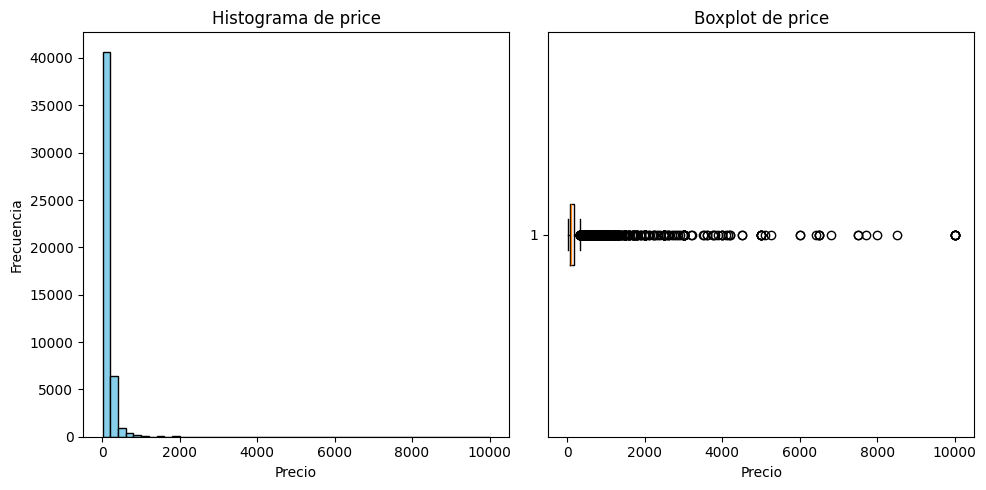

In [67]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [68]:
df['log_price'] = np.log(df['price'])

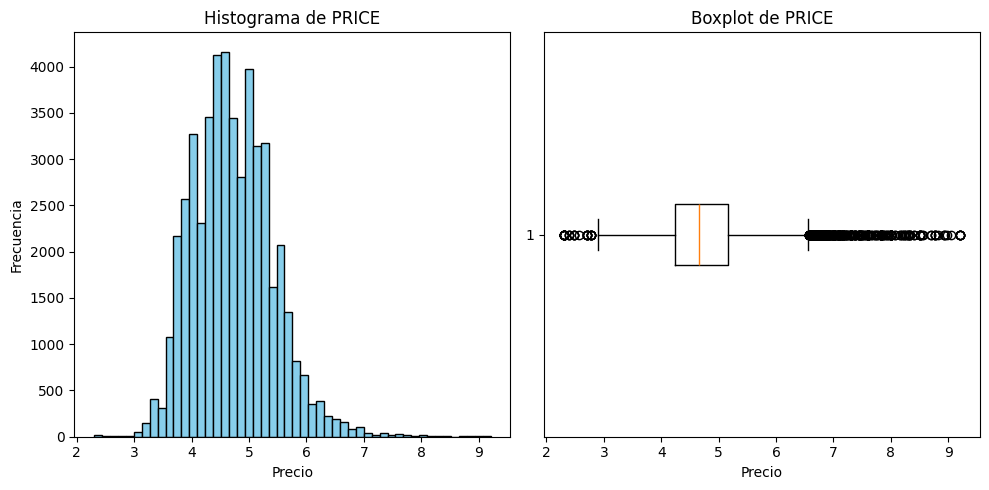

In [69]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['log_price'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['log_price'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [70]:
# Comprobar valores faltantes
df.isnull().mean()*100

name                               0.032731
host_id                            0.000000
host_name                          0.042959
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
log_price                          0.000000
dtype: float64

In [71]:
df.isnull().any(axis=1).mean()*100

np.float64(20.605924228786517)

<Axes: >

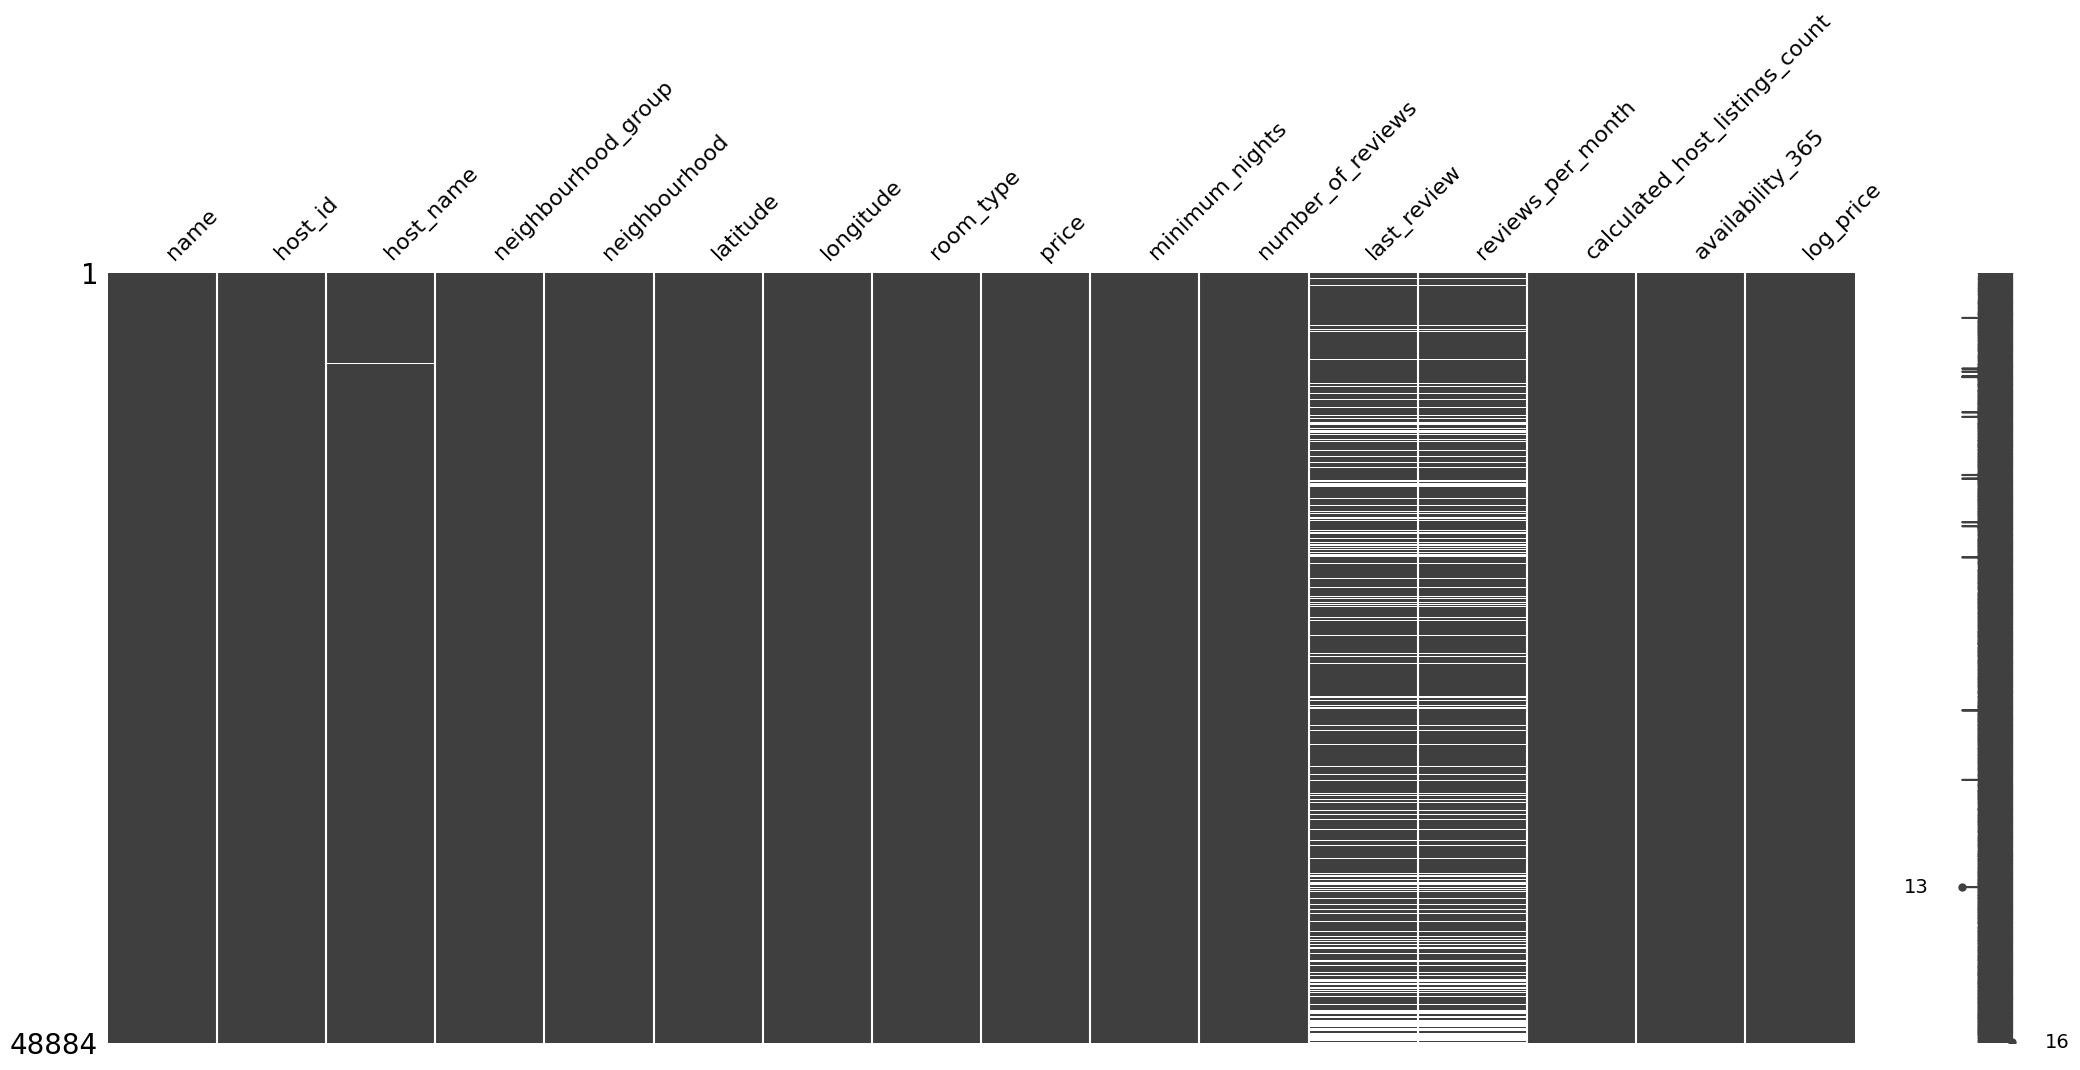

In [72]:
msno.matrix(df)

Los valores faltantes de last_review y reviews_per_month coinciden

In [73]:
# Eliminar
df.drop(['last_review', 'reviews_per_month', 'host_name', 'name', 'neighbourhood'], axis=1, inplace=True)


In [74]:
df.isnull().any(axis=1).mean()*100

np.float64(0.0)

In [75]:
# Cambiar nombres de neighbourhood_group por números en orden alfabético
barrios_grupos = sorted(df['neighbourhood_group'].unique())
print(barrios_grupos)
num_barrios = {barrio: i + 1 for i, barrio in enumerate(barrios_grupos)}
df['neighbourhood_group'] = df['neighbourhood_group'].map(num_barrios)
df

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
0,2787,2,40.64749,-73.97237,Private room,149,1,9,6,365,5.003946
1,2845,3,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.416100
2,4632,3,40.80902,-73.94190,Private room,150,3,0,1,365,5.010635
3,4869,2,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,4.488636
4,7192,3,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.382027
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,2,40.67853,-73.94995,Private room,70,2,0,2,9,4.248495
48891,6570630,2,40.70184,-73.93317,Private room,40,4,0,2,36,3.688879
48892,23492952,3,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,4.744932
48893,30985759,3,40.75751,-73.99112,Shared room,55,1,0,6,2,4.007333


In [76]:
# Cambiar nombre room_type por 1: Entire home al 3: Shared room
ranking_habitacion = {
    "Entire home/apt": 1,
    "Private room": 2,
    "Shared room": 3
}
df["room_type"] = df["room_type"].map(ranking_habitacion)
df

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
0,2787,2,40.64749,-73.97237,2,149,1,9,6,365,5.003946
1,2845,3,40.75362,-73.98377,1,225,1,45,2,355,5.416100
2,4632,3,40.80902,-73.94190,2,150,3,0,1,365,5.010635
3,4869,2,40.68514,-73.95976,1,89,1,270,1,194,4.488636
4,7192,3,40.79851,-73.94399,1,80,10,9,1,0,4.382027
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,2,40.67853,-73.94995,2,70,2,0,2,9,4.248495
48891,6570630,2,40.70184,-73.93317,2,40,4,0,2,36,3.688879
48892,23492952,3,40.81475,-73.94867,1,115,10,0,1,27,4.744932
48893,30985759,3,40.75751,-73.99112,3,55,1,0,6,2,4.007333


In [79]:
# Separar variable dependiente de independientes
X = df.drop(['price', 'log_price'], axis = 1)
y = df['log_price']

In [81]:
# Ajustar modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

# Distancia de cook
cooks_distance = model.get_influence().cooks_distance

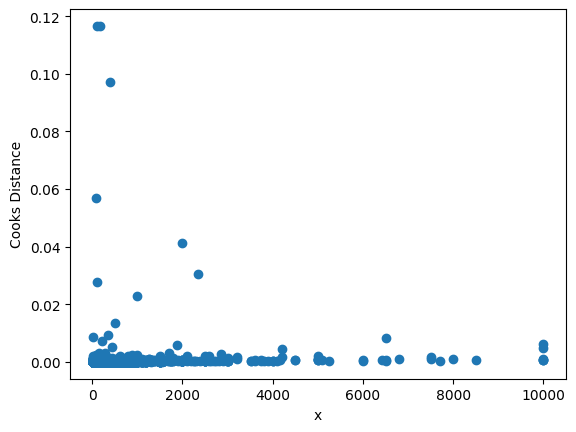

In [83]:
plt.scatter(df.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df)

# Anuncios por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

2335

In [85]:
# Eliminar observaciones que se consideran influentes
df_1 = df.drop(np.where(cooks_distance[0] > pto_corte)[0])

In [86]:
# Separamos las variables independientes de la dependiente
X = df_1.drop(['price','log_price'], axis=1)
y = df_1['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
4,room_type,86.449585
3,longitude,3.615593
2,latitude,2.262892
8,availability_365,1.780129
5,minimum_nights,1.736150
7,calculated_host_listings_count,1.351846
6,number_of_reviews,1.290193
0,host_id,0.815993
1,neighbourhood_group,0.697620


In [88]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

VIF

In [89]:
X_train.corr()

,room_type,longitude,latitude,availability_365,minimum_nights,calculated_host_listings_count,number_of_reviews
room_type,1.000000,0.188378,0.008224,0.028564,-0.072034,-0.102881,-0.001696
longitude,0.188378,1.000000,0.075434,0.090906,-0.074558,-0.113060,0.062257
latitude,0.008224,0.075434,1.000000,-0.006205,0.023423,0.019004,-0.010458
availability_365,0.028564,0.090906,-0.006205,1.000000,0.164898,0.222436,0.182853
minimum_nights,-0.072034,-0.074558,0.023423,0.164898,1.000000,0.163874,-0.097205
calculated_host_listings_count,-0.102881,-0.113060,0.019004,0.222436,0.163874,1.000000,-0.072199
number_of_reviews,-0.001696,0.062257,-0.010458,0.182853,-0.097205,-0.072199,1.000000


In [90]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

room_type                         1.208711
longitude                         1.311858
latitude                          1.031917
availability_365                  1.664711
minimum_nights                    1.306876
calculated_host_listings_count    1.484740
number_of_reviews                 1.285440
dtype: float64

<Axes: >

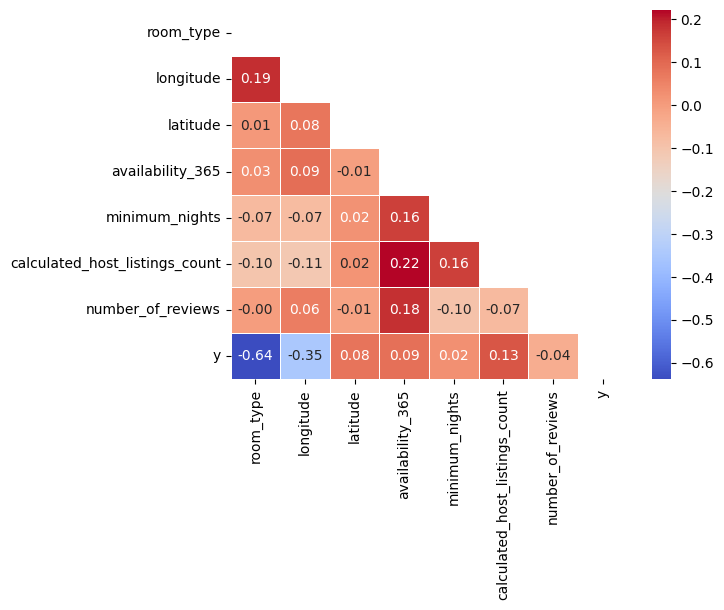

In [91]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [93]:
# Instancio la clase del escalador y lo ajusto con los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train)

# Trasnformamos los datos numericos con el escalador ajustado
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train_sc

,room_type,longitude,latitude,availability_365,minimum_nights,calculated_host_listings_count,number_of_reviews
0,0.0,0.564741,0.829411,0.000000,0.003006,0.000000,0.000000
1,0.5,0.644417,0.497602,0.882192,0.029058,0.067485,0.000000
2,0.5,0.614838,0.431723,0.868493,0.001002,0.027607,0.018122
3,0.0,0.577898,0.860224,0.000000,0.000000,0.000000,0.000000
4,0.0,0.647276,0.468904,0.000000,0.001002,0.003067,0.006590
...,...,...,...,...,...,...,...
37234,0.5,0.543451,0.791491,0.000000,0.000000,0.000000,0.001647
37235,0.0,0.481337,0.455674,0.030137,0.001002,0.000000,0.003295
37236,0.0,0.563601,0.776343,0.008219,0.003006,0.000000,0.000000
37237,0.5,0.589277,0.885700,0.849315,0.006012,0.003067,0.075783
